# Exploratory Data Analysis of 911 Emergency Calls Project

Link to the 911 Calls dataset: https://www.kaggle.com/mchirico/montcoalert

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Enable inline plotting
%matplotlib inline

In [3]:
# Set Seaborn style
sns.set_style("whitegrid")

In [4]:
# Read in the CSV file as a DataFrame
df = pd.read_csv('911.csv')

In [5]:
# Check the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
# Get the shape of the DataFrame
df.shape

(99492, 9)

In [7]:
# Display the first 5 rows of the DataFrame
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
# Display basic statistics about the numeric columns
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [9]:
# Check for missing values in the DataFrame
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [10]:
# Drop rows with missing values
df = df.dropna()

## Answering Questions

In [11]:
# What are the top 5 zipcodes with the highest number of 911 calls?
df['zip'].value_counts().head(5)

19401.0    6977
19464.0    6641
19403.0    4854
19446.0    4745
19406.0    3173
Name: zip, dtype: int64

In [12]:
# What are the top 5 specific reasons for 911 calls?
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    19525
Traffic: DISABLED VEHICLE -     5764
Fire: FIRE ALARM                5134
EMS: RESPIRATORY EMERGENCY      4810
EMS: CARDIAC EMERGENCY          4686
Name: title, dtype: int64

In [13]:
# Which townships are among the top 5 with the highest number of 911 calls?
df['twp'].value_counts().head(5)

LOWER MERION    7202
ABINGTON        5675
NORRISTOWN      5610
POTTSTOWN       4029
CHELTENHAM      3942
Name: twp, dtype: int64

In [14]:
# How many unique zipcodes are represented in the dataset?
df['zip'].nunique()

102

In [15]:
# Extract the reason from the 'title' column and create a new 'reason' column
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [16]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS


In [17]:
# What are the most common reasons for 911 calls based on the 'title' column?
df['reason'].value_counts().head(1)

EMS    44318
Name: reason, dtype: int64

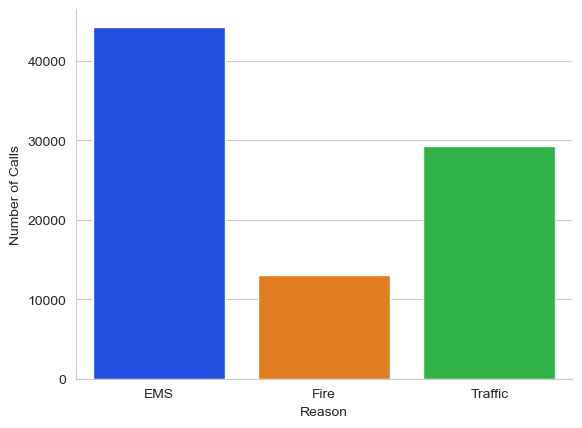

In [18]:
# How does the count of 911 calls vary across different reasons?
sns.countplot(x=df['reason'], palette='bright')
plt.xlabel('Reason')
plt.ylabel('Number of Calls')
sns.despine()

In [19]:
# Check data type of timeStamp column
type(df['timeStamp'][0])

str

In [20]:
# Convert 'timeStamp' column to datetime type
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [21]:
# Extract hour, month, and day of week information from 'timeStamp'
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day'] = df['timeStamp'].apply(lambda x: x.day_name()[:3])

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu


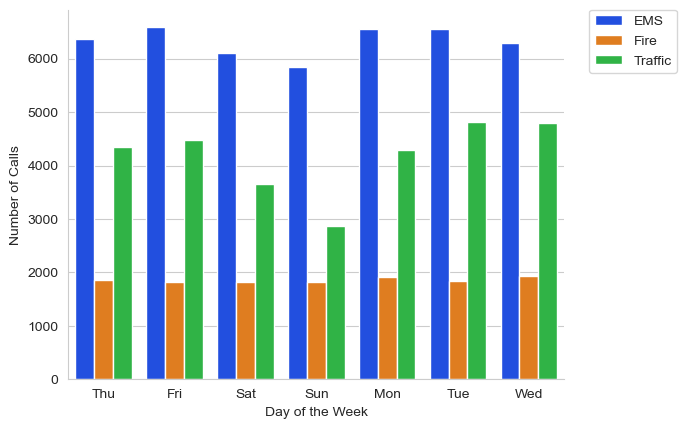

In [23]:
# How does the distribution of 911 calls vary throughout the days of the week for different reasons?
sns.countplot(x=df['day'], hue=df['reason'], palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
sns.despine()

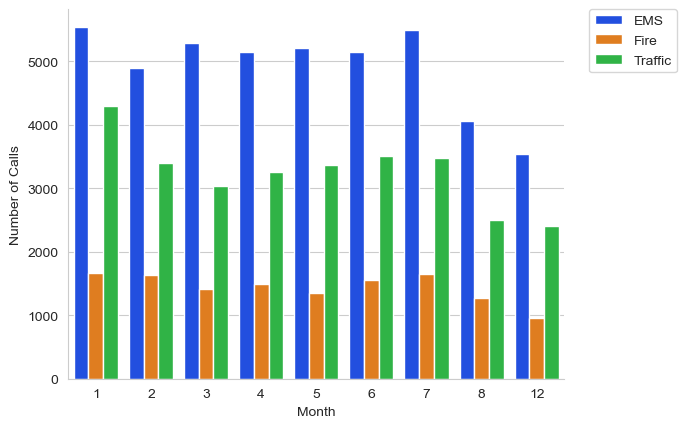

In [24]:
# What is the distribution of 911 calls across different months, categorized by reasons for the calls?
sns.countplot(x=df['month'], hue=df['reason'], palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Month')
plt.ylabel('Number of Calls')
sns.despine()

Text(0, 0.5, 'Number of Calls')

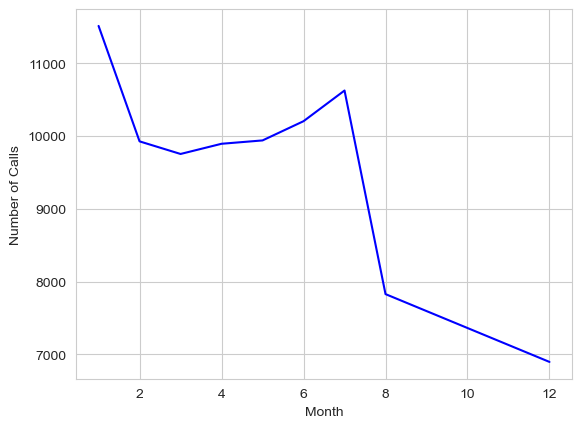

In [25]:
# How does the total count of 911 calls vary across different months?
countByMonth = df.groupby('month').count()
countByMonth['twp'].plot(kind='line',c = 'blue')
plt.xlabel('Month')
plt.ylabel('Number of Calls')

Text(8.031250000000002, 0.5, 'Number of Calls')

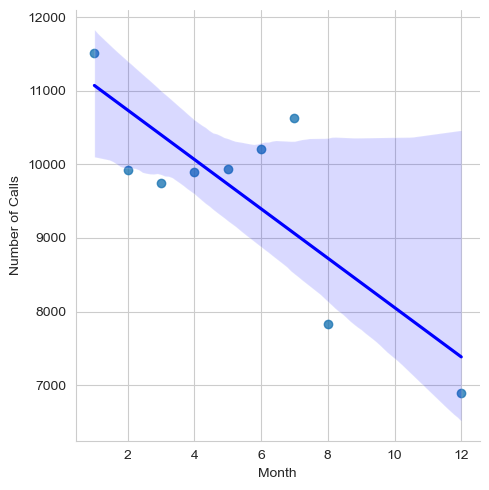

In [26]:
# Is there a noticeable trend relationship between the month and the total number of 911 calls?
sns.lmplot(x='month', y='twp', data=countByMonth.reset_index(),line_kws={'color': 'blue'})
plt.xlabel('Month')
plt.ylabel('Number of Calls')

In [27]:
# Create a new column 'date' containing the date from 'timeStamp'
df['date'] = df['timeStamp'].apply(lambda x: x.date())

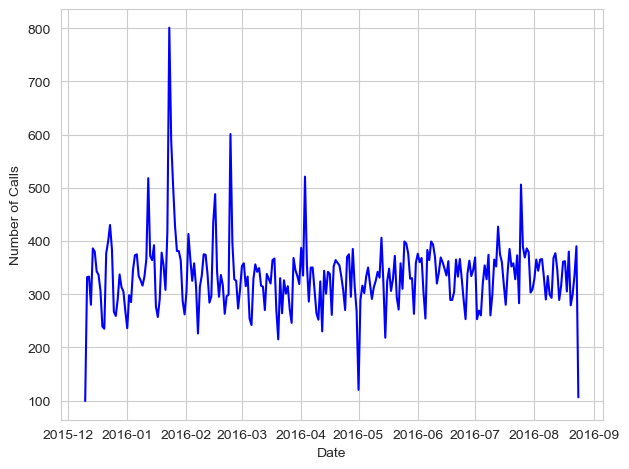

In [28]:
# How does the total count of 911 calls vary across different dates?
df.groupby('date').count()['twp'].plot(kind='line',c = 'blue')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.tight_layout()

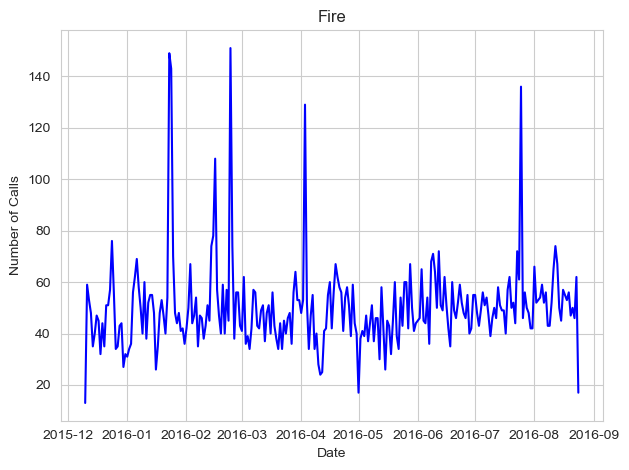

In [29]:
# How does the total count of 911 calls of Fire reason vary across different dates?
df[df['reason'] == 'Fire'].groupby('date').count()['twp'].plot(kind = 'line',c = 'blue')
plt.title('Fire')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.tight_layout()

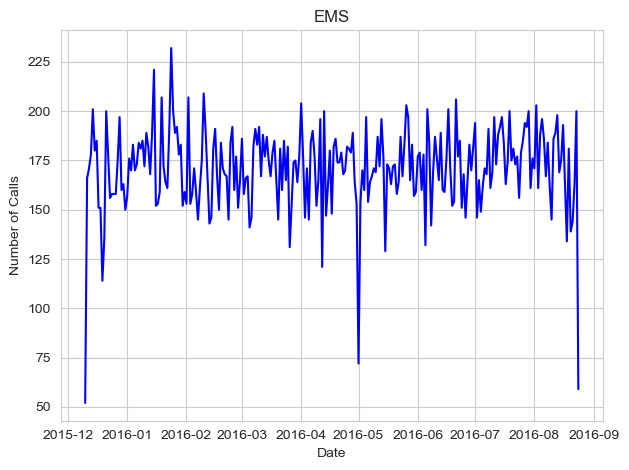

In [30]:
# How does the total count of 911 calls of EMS reason vary across different dates?
df[df['reason'] == 'EMS'].groupby('date').count()['twp'].plot(kind = 'line',c = 'blue')
plt.title('EMS')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.tight_layout()

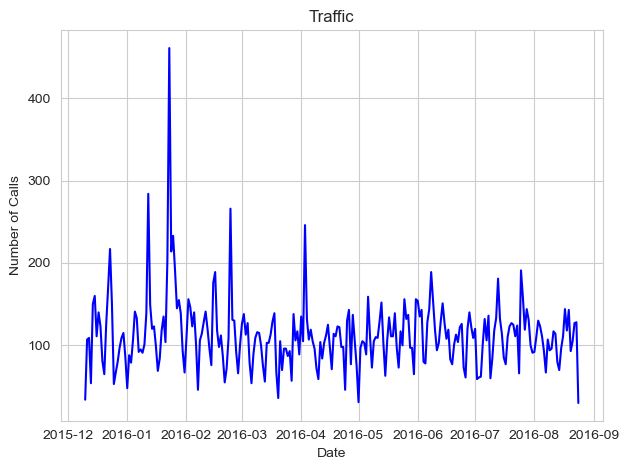

In [31]:
# How does the total count of 911 calls of Traffic reason vary across different dates?
df[df['reason'] == 'Traffic'].groupby('date').count()['twp'].plot(kind = 'line',c = 'blue')
plt.title('Traffic')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.tight_layout()

In [32]:
# Create a DataFrame for heatmap with hours as columns and days of the week as index
dayHour = df.groupby(by=['day','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,248,200,165,164,184,166,319,525,636,663,...,806,839,897,825,714,616,569,491,445,400
Mon,243,198,183,173,185,222,338,547,723,689,...,759,776,837,845,762,654,547,443,410,294
Sat,324,265,226,212,202,205,227,352,416,566,...,674,677,705,649,678,613,549,508,450,402
Sun,335,280,245,228,199,214,251,342,434,554,...,608,588,555,608,574,559,464,419,365,283
Thu,251,180,200,144,162,167,293,495,685,733,...,758,827,790,867,706,610,543,472,356,307


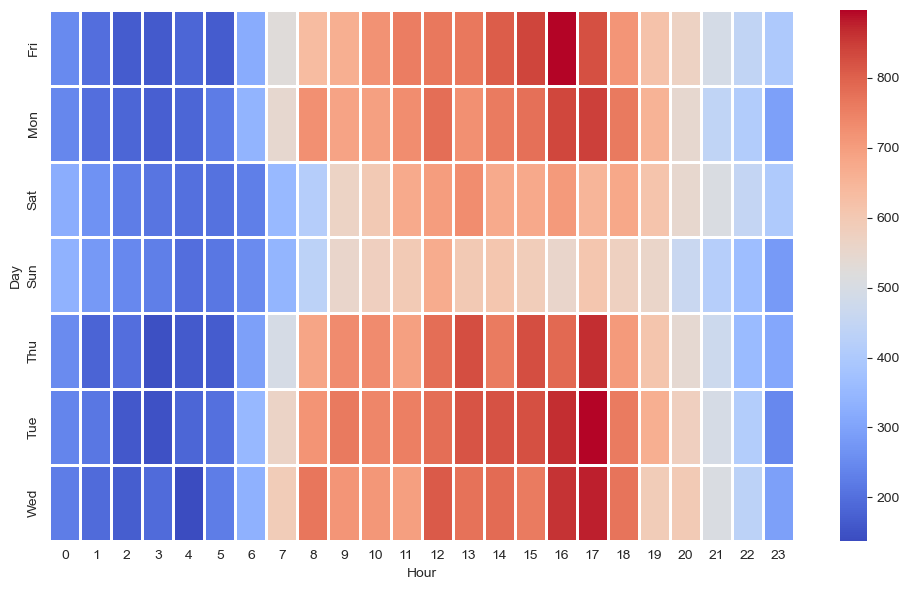

In [36]:
# Create a heatmap for dayHour
plt.figure(figsize=(10, 6))
sns.heatmap(dayHour,cmap = 'coolwarm',lw = 1, linecolor = 'white')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.tight_layout()

In [34]:
# Create a DataFrame for heatmap with months as columns and days of the week as index
dayMonth = df.groupby(by=['day','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
Fri,1735,1360,1331,1683,1504,1429,1810,1123,905
Mon,1505,1658,1364,1401,1547,1395,1472,1315,1100
Sat,1979,1240,1110,1512,1264,1201,1507,955,831
Sun,1726,1058,973,1304,1230,1136,1440,878,805
Thu,1387,1391,1648,1390,1387,1800,1447,1038,1087


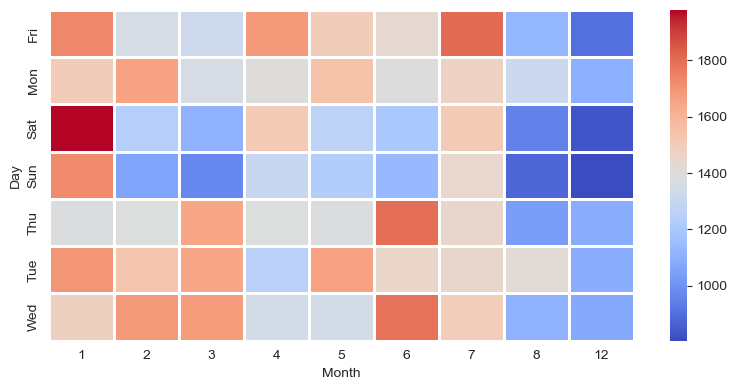

In [39]:
# Create a heatmap for dayMonth
plt.figure(figsize=(8, 4))
sns.heatmap(dayMonth,cmap = 'coolwarm',lw = 1, linecolor = 'white')
plt.xlabel('Month')
plt.ylabel('Day')
plt.tight_layout()